2024-07-11 12:20:13.254 | DEBUG    | aa_uv.acacia.acacia:get_h5:73 - Setting up h5py debug trace
2024-07-11 12:20:13.254 | DEBUG    | aa_uv.acacia.acacia:get_url:67 - URL: https://ingest.pawsey.org.au/devel/test/correlation_burst_204_20210612_16699_0.uvx


<KeysViewHDF5 ['antennas', 'context', 'phase_center', 'provenance', 'visibilities']>


2024-07-11 12:20:23.897 | INFO     | aa_uv.postx.calibration.holography:jishnu_selfholo:222 - Generating vis matrix: data


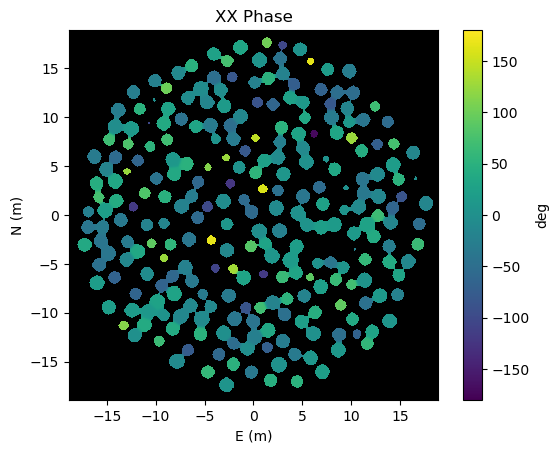

In [1]:
import pylab as plt
from aa_uv.acacia import AcaciaStorage
from aa_uv.postx import ApertureArray

In [ ]:
def test_acacia_plots():
    """Test read and then plot from acacia using ROS3 VFD."""
    acacia = AcaciaStorage()
    bucket = 'devel'
    fpath  = 'test/correlation_burst_204_20210612_16699_0.uvx'
    h5 = acacia.get_h5(bucket, fpath, debug=True)
    print(h5.keys())

    uvx = acacia.read_uvx(bucket, fpath)
    aa = ApertureArray(uvx)

    aa.calibration.holography.set_cal_src(aa.coords.get_sun())
    aa.calibration.holography.run_selfholo()
    aa.calibration.holography.plot_aperture(plot_type='phs')
    plt.show()

test_acacia_plots()